In [146]:
#Import all libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [147]:
#Load datasets
df = pd.read_csv('Stock Price Data.csv')
df_submission = pd.read_csv('Sample Submission.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,31/12/2009,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
1,4/01/2010,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2,5/01/2010,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
3,6/01/2010,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
4,7/01/2010,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4


In [148]:
#Get num rows & cols
df.shape

(2265, 7)

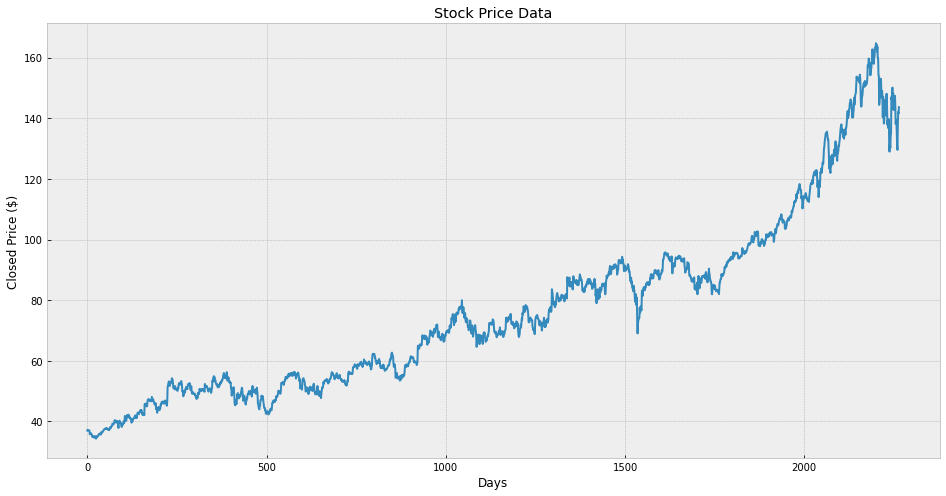

In [149]:
#Visualize Close Price data
plt.figure(figsize=(16,8))
plt.title('Stock Price Data')
plt.xlabel('Days')
plt.ylabel('Closed Price ($)')
plt.plot(df['Close'])

In [150]:
#We only want Close column
data = df.filter(['Close'])
dataset = data.values

In [151]:
#Scale the data set to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [152]:
#Create training data set
training_data_len = math.ceil(len(dataset)*.8)
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [153]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [154]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [155]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1752/1752 [==============================] - 28s 16ms/step - loss: 7.1876e-04


In [156]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [157]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [158]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [159]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [160]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.337574086019264

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


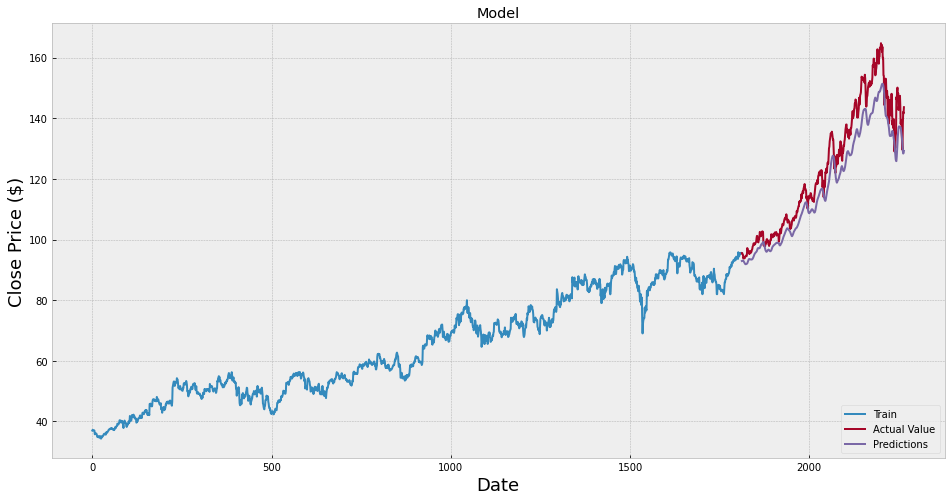

In [161]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

In [162]:
#Predict the close price for the next 355 days from last 60 days data
new_df = df.filter(['Close'])
last_60_days = new_df[-60:].values

for i in range(60, 415):
    last_60_days_scaled = scaler.transform(last_60_days)
    X_test = []
    X_test.append(last_60_days_scaled[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predict = model.predict(X_test)
    predict_value = scaler.inverse_transform(predict)
    last_60_days = np.append(last_60_days, predict_value)
    last_60_days = np.reshape(last_60_days, (len(last_60_days), 1))

In [163]:
#Getting predicted results
predictedValues = last_60_days[60:len(last_60_days)]
predictedValues

array([[130.33787537],
       [130.08677673],
       [129.22425842],
       [128.02964783],
       [126.66902924],
       [125.23799133],
       [123.79079437],
       [122.35790253],
       [120.9560318 ],
       [119.59390259],
       [118.27572632],
       [117.00305939],
       [115.77586365],
       [114.5932312 ],
       [113.4536972 ],
       [112.35543823],
       [111.29652405],
       [110.2749939 ],
       [109.28881836],
       [108.33605194],
       [107.41481018],
       [106.52331543],
       [105.65988922],
       [104.82298279],
       [104.01113892],
       [103.22298431],
       [102.45729065],
       [101.7129364 ],
       [100.98884583],
       [100.28406525],
       [ 99.5976944 ],
       [ 98.9289093 ],
       [ 98.27694702],
       [ 97.64112854],
       [ 97.02078247],
       [ 96.41530609],
       [ 95.82411194],
       [ 95.24668884],
       [ 94.68253326],
       [ 94.13114929],
       [ 93.59211731],
       [ 93.06502533],
       [ 92.54945374],
       [ 92

In [164]:
#Exporting results into csv
df_submission1 = df_submission.copy(deep=True)
df_submission1['Close'] = predictedValues
df_submission1.to_csv('lstm_model.csv', index=False)